importing Jupyter notebook from Ridge_Regression.ipynb
Categorical features is=======> ['team']
Numerical features is=======> ['year', 'athletes', 'events', 'age', 'height', 'weight', 'prev_medals', 'medals']
Outlier features is=======> ['athletes', 'events', 'age', 'height', 'weight', 'prev_medals']


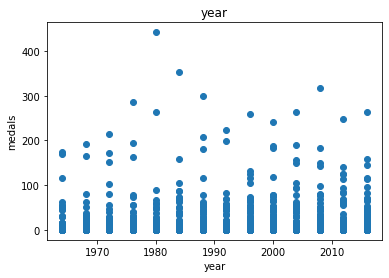

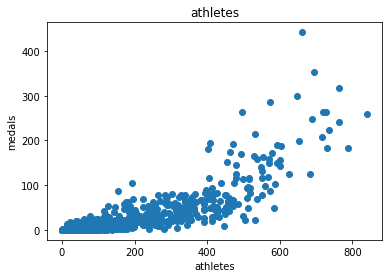

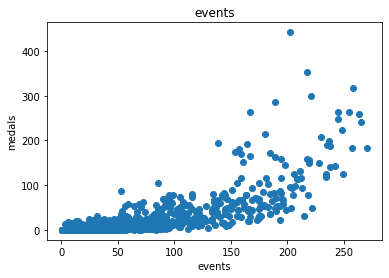

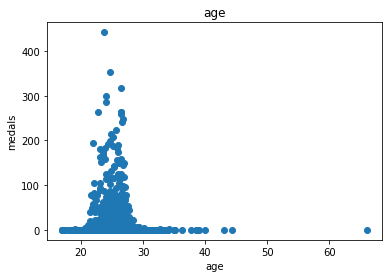

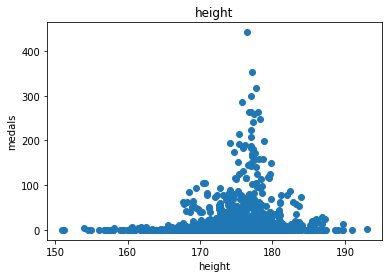

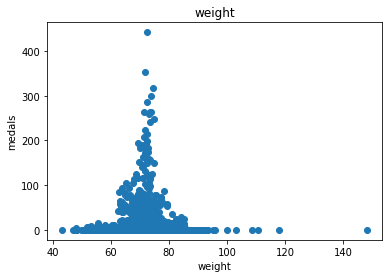

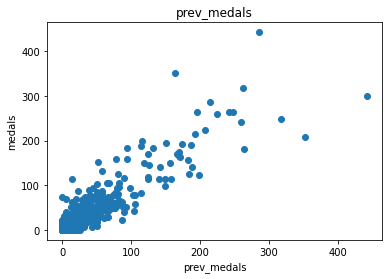

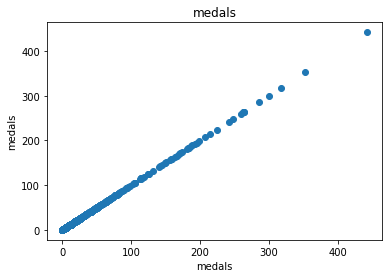

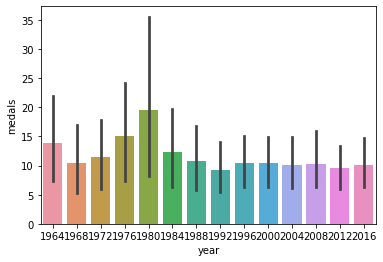

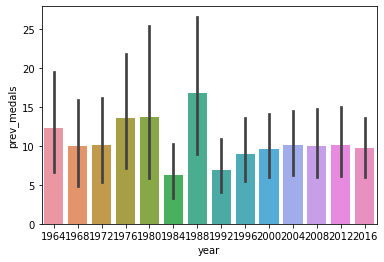

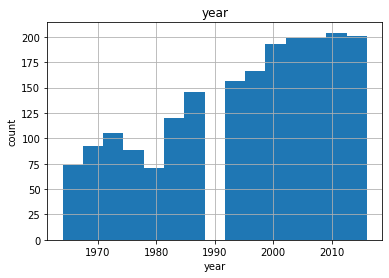

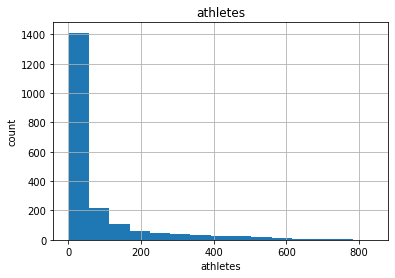

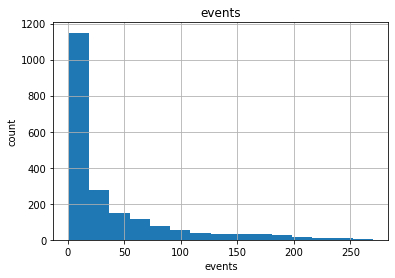

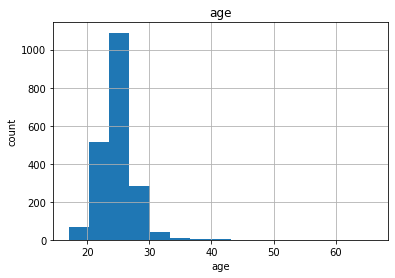

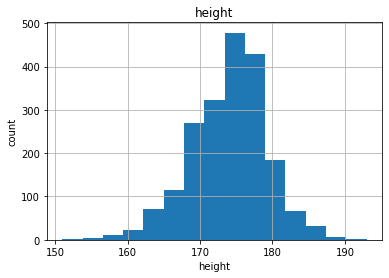

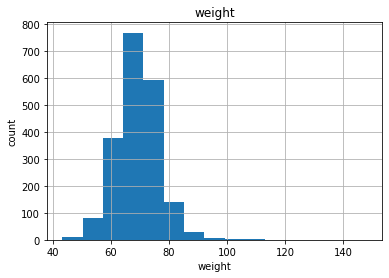

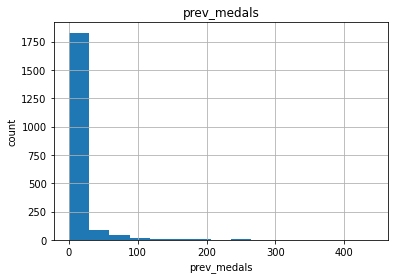

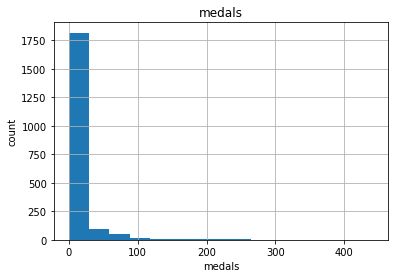

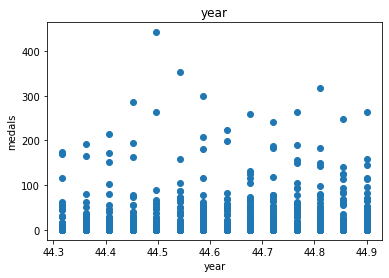

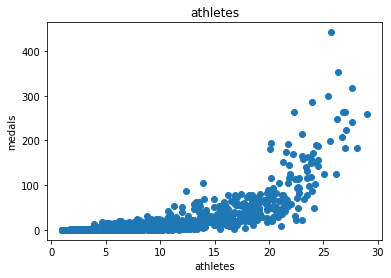

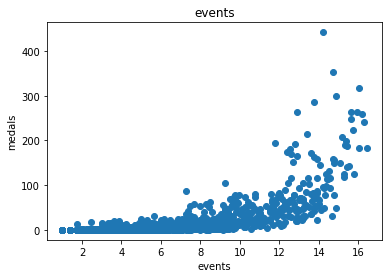

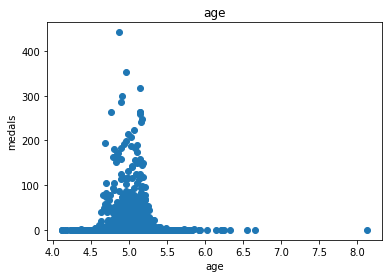

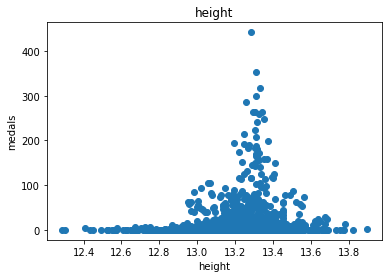

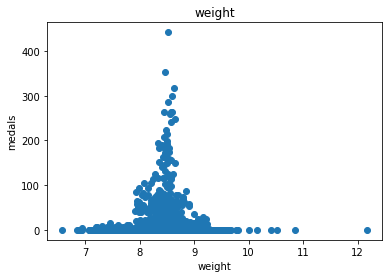

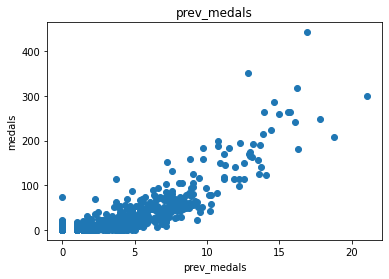

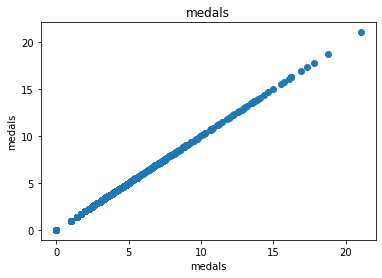

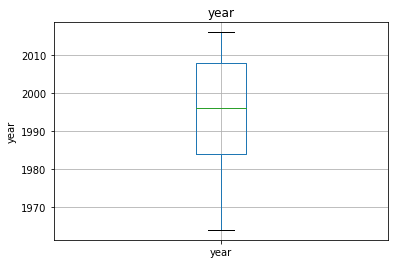

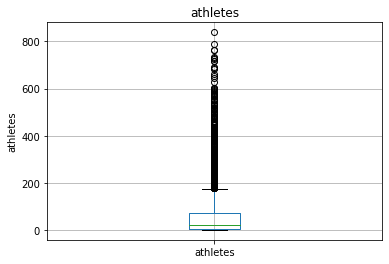

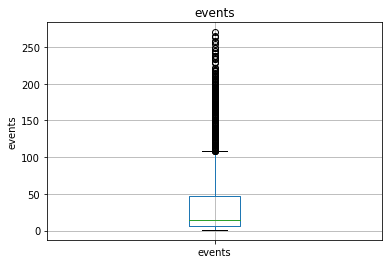

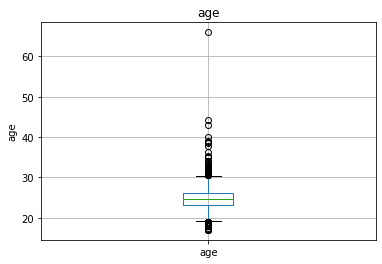

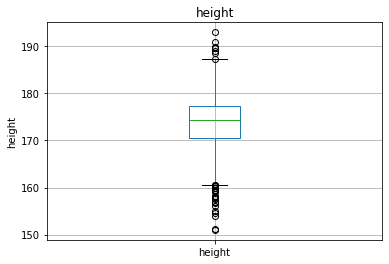

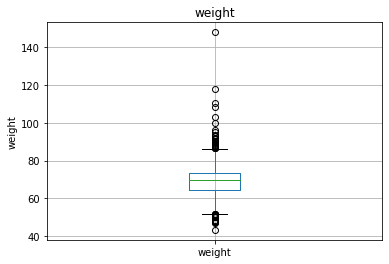

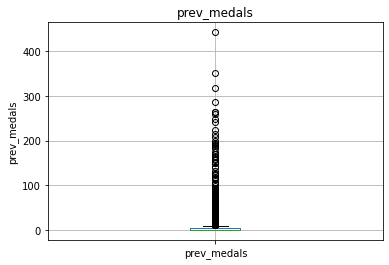

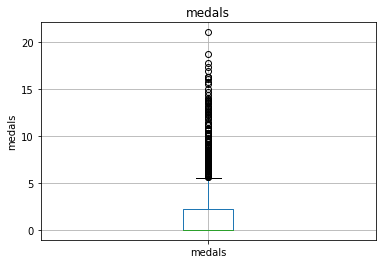

['athletes', 'events', 'age', 'height', 'weight', 'prev_medals']
team            object
year             int64
athletes         int64
events           int64
age            float64
height         float64
weight         float64
prev_medals    float64
medals         float64
dtype: object
  team  year  athletes  events   age  height  weight  prev_medals  medals
0  AFG  1964         8       8  22.0   161.0    64.2          0.0     0.0
1  AFG  1968         5       5  23.2   170.2    70.0          0.0     0.0
2  AFG  1972         8       8  29.0   168.3    63.8          0.0     0.0
3  AFG  1980        11      11  23.6   168.4    63.2          0.0     0.0
4  AFG  2004         5       5  18.6   170.8    64.8          0.0     0.0
The null hypothesis is rejected
test score 0.3512376503161475
train score 0.3549497998474486
best_alpha 0.9
RMSE-------> 0.3512376503161475
rSquare----> 0.8912248021334541
MAE--------> 0.24222748486246376
RMSE-------> 0.35123765031614435
rSquare----> 0.8912248021334561


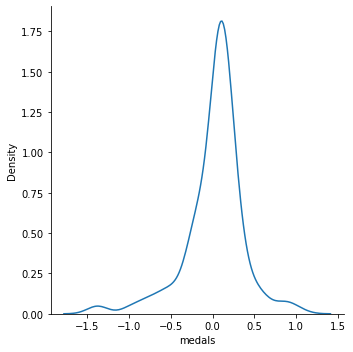

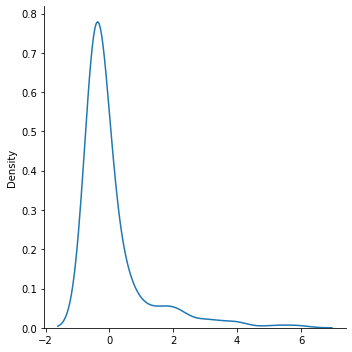

In [7]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sys
sys.path.append('/content/')
import import_ipynb
import Ridge_Regression as ridge

In [8]:
#Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/cancer_reg (1).csv", encoding='latin-1')
df.shape

(3047, 34)

In [9]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O')], dtype=object)

In [10]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [11]:
df.columns = df.columns.str.replace(' ', '')

In [12]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [13]:
column1 = df.pop('TARGET_deathRate')
df.insert(33, 'TARGET_deathRate', column1)

In [14]:
df

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1397.000000,469,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.000000,70,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.000000,50,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.000000,202,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.000000,26,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,...,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,149.6
3043,1962.667684,43,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,...,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,150.1
3044,1962.667684,46,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,...,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,153.9
3045,1962.667684,52,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,...,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,175.0


In [15]:
CategoricalFeatures = [feature for feature in df.columns if df[feature].dtypes =='O']
NumericalFeatures = [feature for feature in df.columns if feature not in CategoricalFeatures]
target = df['TARGET_deathRate']
OutlierFeatures = [feature for feature in df.columns if feature not in CategoricalFeatures]

In [16]:
target

0       164.9
1       161.3
2       174.7
3       194.8
4       144.4
        ...  
3042    149.6
3043    150.1
3044    153.9
3045    175.0
3046    213.6
Name: TARGET_deathRate, Length: 3047, dtype: float64

In [17]:
NumericalFeatures

['avgAnnCount',
 'avgDeathsPerYear',
 'incidenceRate',
 'medIncome',
 'popEst2015',
 'povertyPercent',
 'studyPerCap',
 'MedianAge',
 'MedianAgeMale',
 'MedianAgeFemale',
 'AvgHouseholdSize',
 'PercentMarried',
 'PctNoHS18_24',
 'PctHS18_24',
 'PctSomeCol18_24',
 'PctBachDeg18_24',
 'PctHS25_Over',
 'PctBachDeg25_Over',
 'PctEmployed16_Over',
 'PctUnemployed16_Over',
 'PctPrivateCoverage',
 'PctPrivateCoverageAlone',
 'PctEmpPrivCoverage',
 'PctPublicCoverage',
 'PctPublicCoverageAlone',
 'PctWhite',
 'PctBlack',
 'PctAsian',
 'PctOtherRace',
 'PctMarriedHouseholds',
 'BirthRate',
 'TARGET_deathRate']

In [18]:
CategoricalFeatures

['binnedInc', 'Geography']

In [19]:
#df2 = df.url.str.split('/')

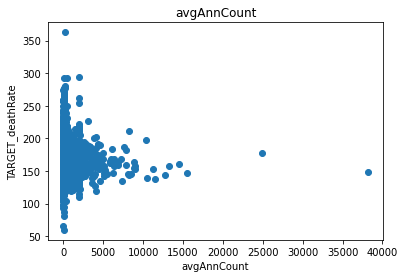

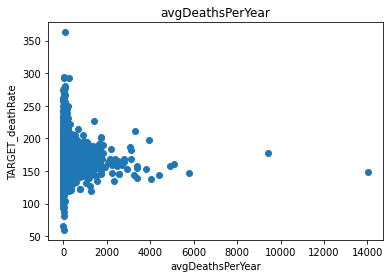

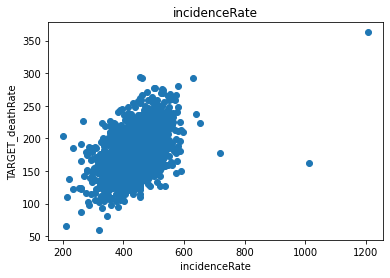

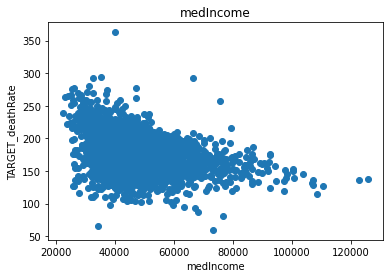

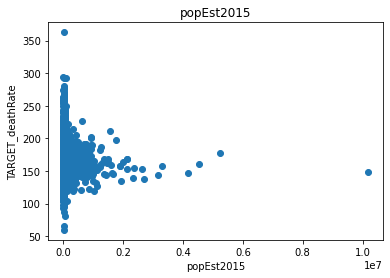

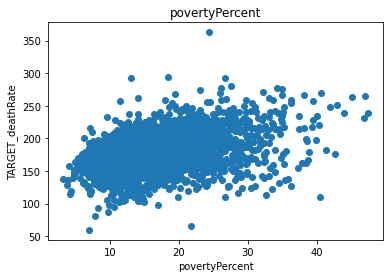

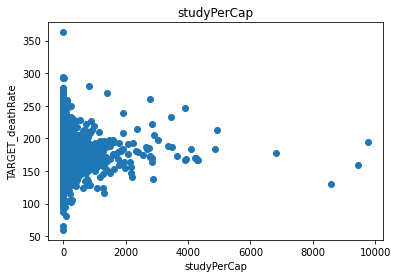

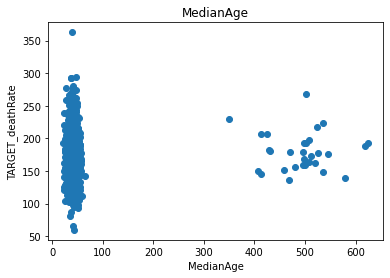

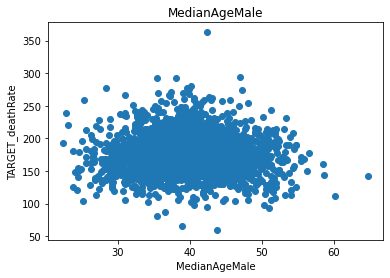

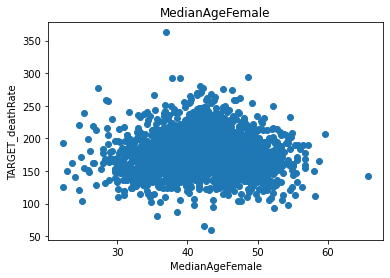

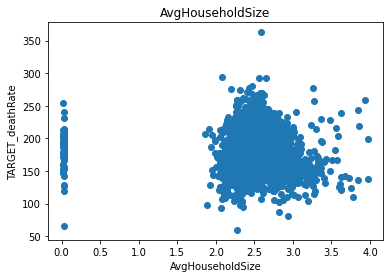

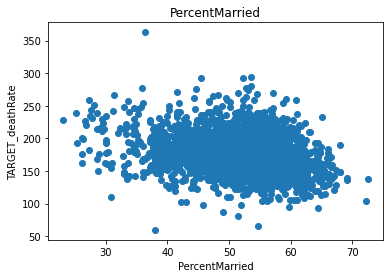

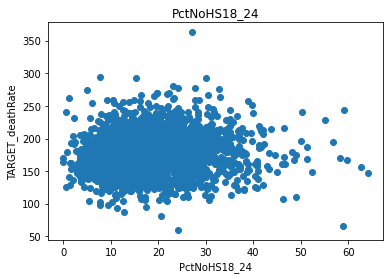

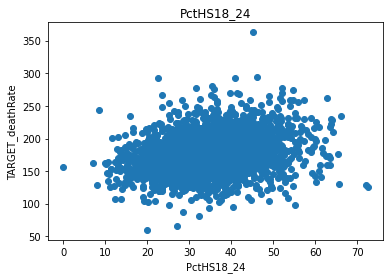

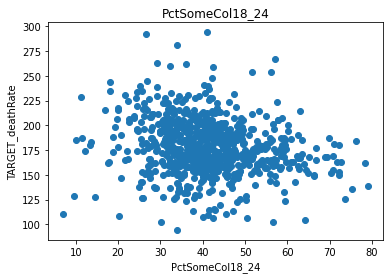

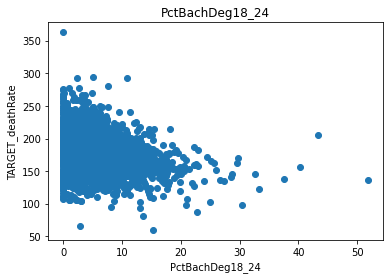

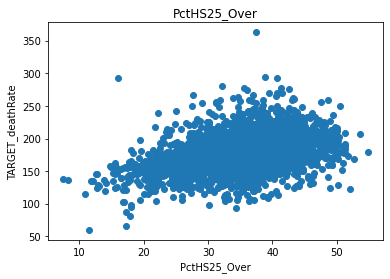

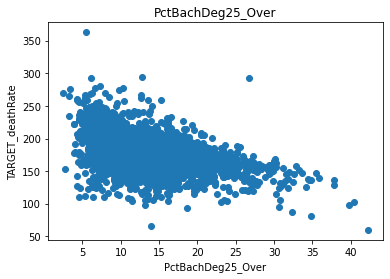

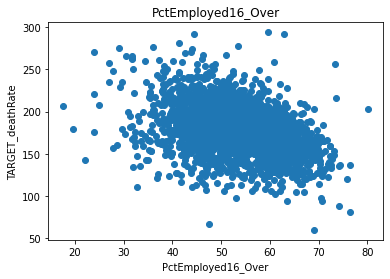

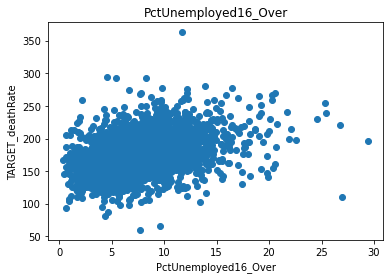

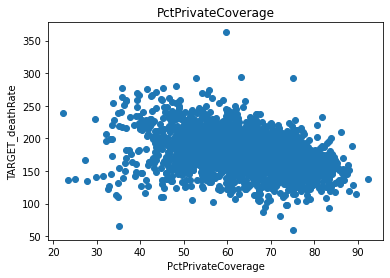

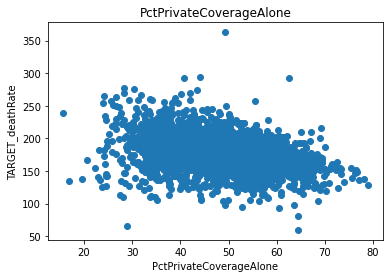

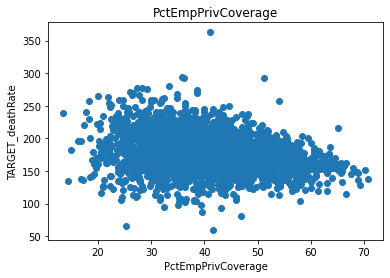

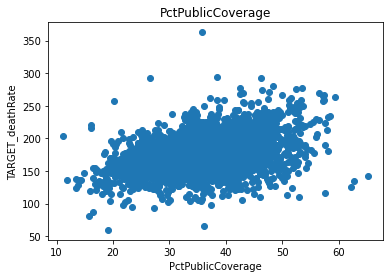

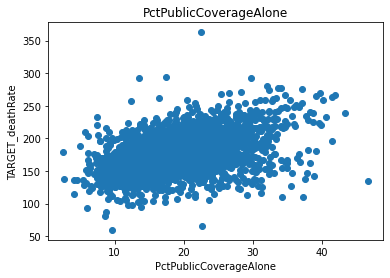

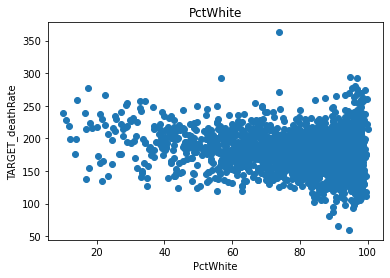

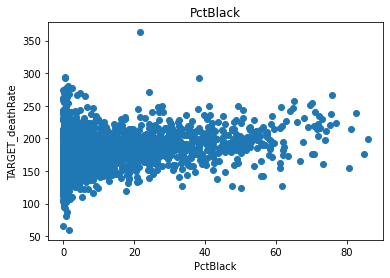

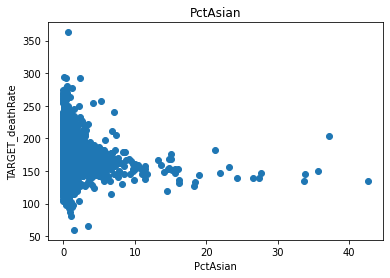

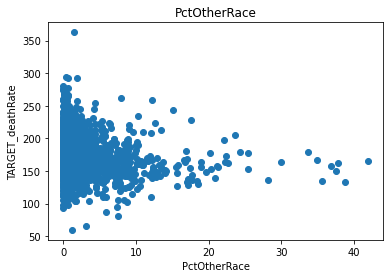

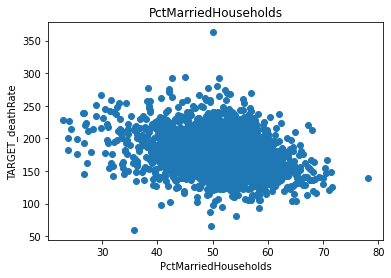

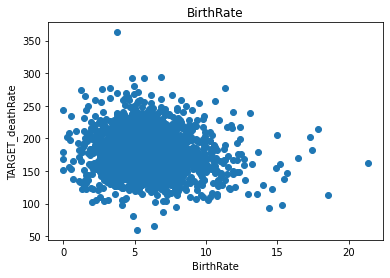

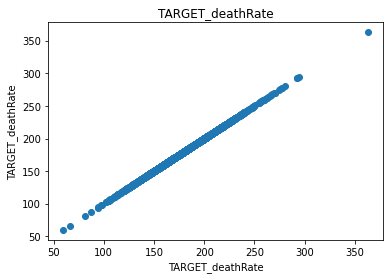

In [20]:
for feature in NumericalFeatures:
  data=df.copy()
  plt.scatter(data[feature],data['TARGET_deathRate'])
  plt.xlabel(feature)
  plt.ylabel('TARGET_deathRate')
  plt.title(feature)
  plt.show()

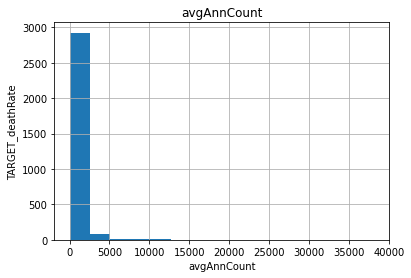

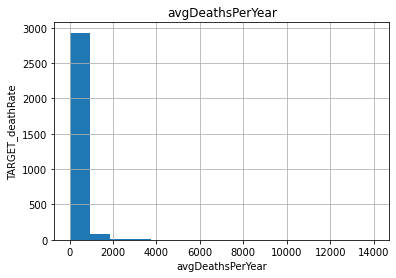

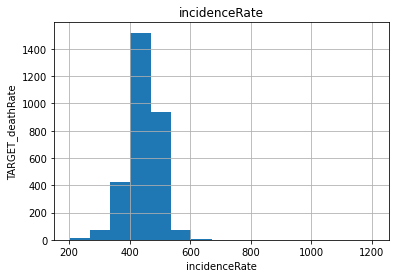

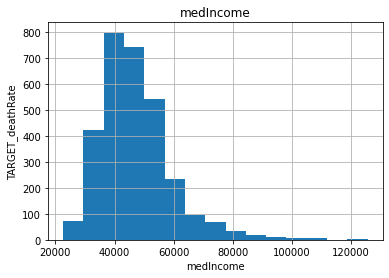

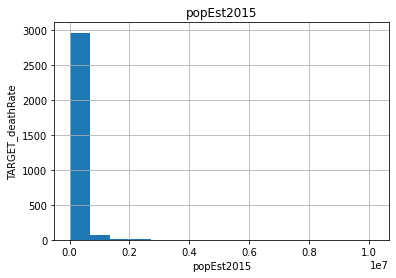

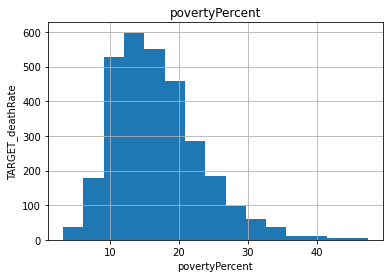

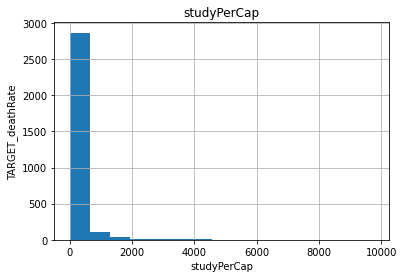

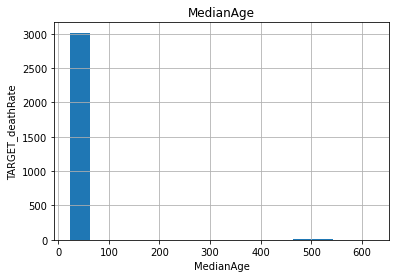

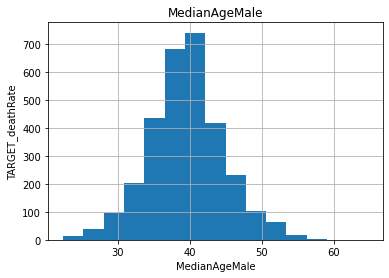

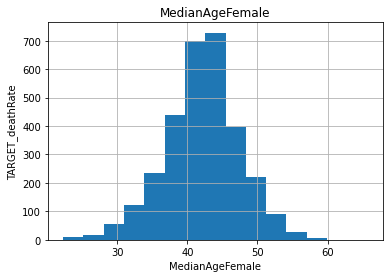

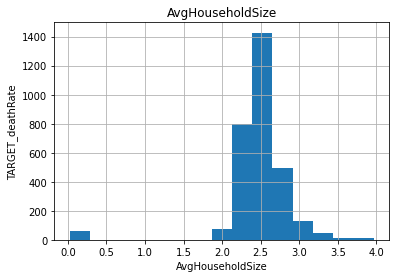

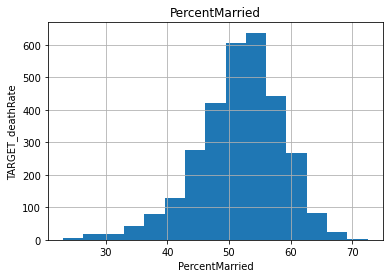

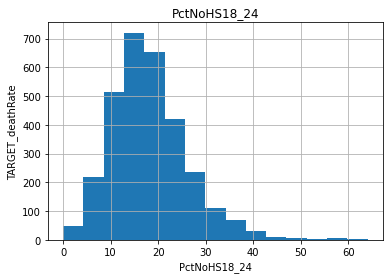

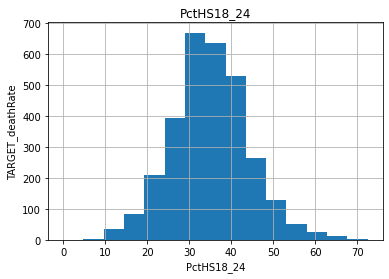

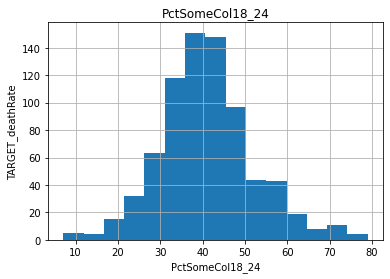

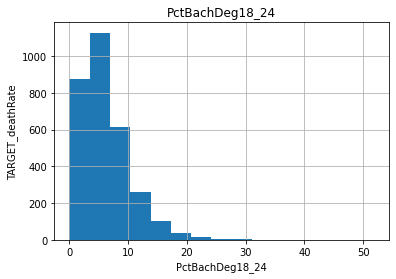

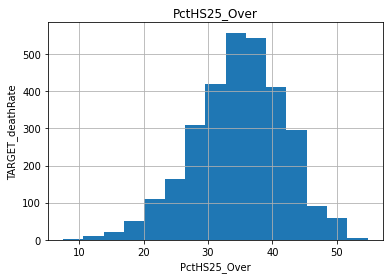

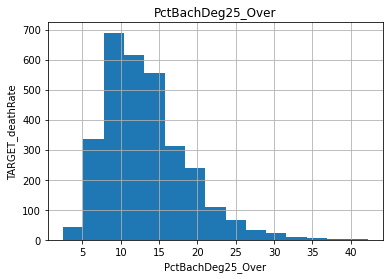

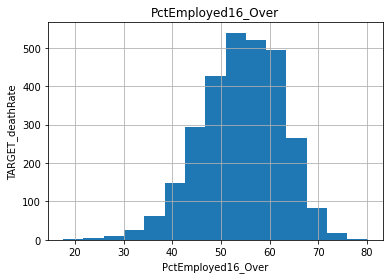

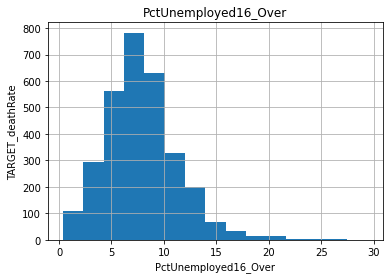

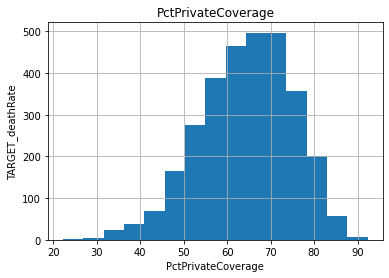

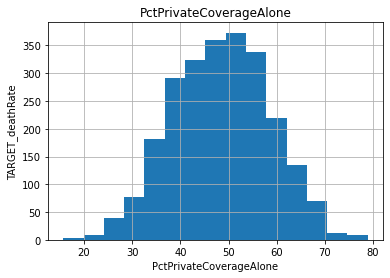

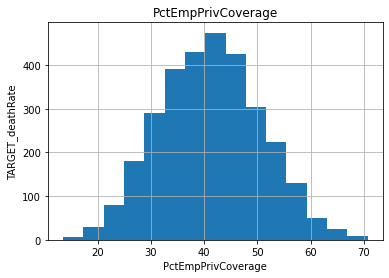

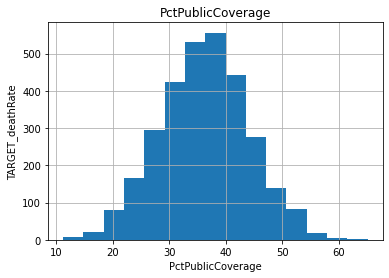

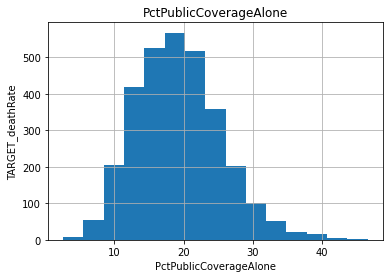

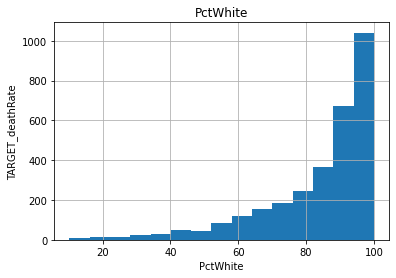

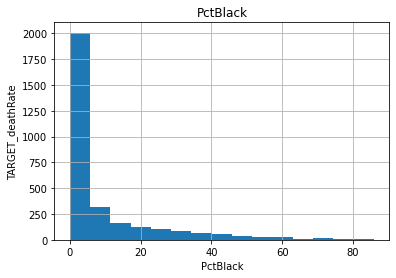

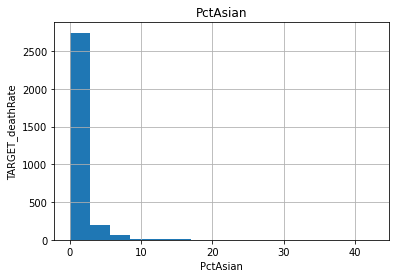

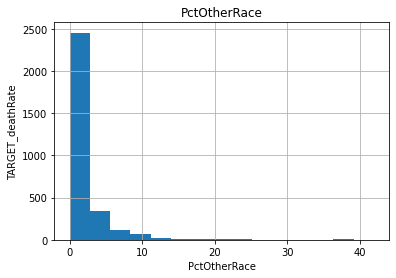

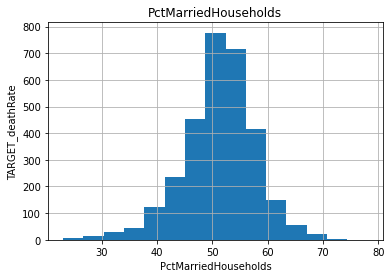

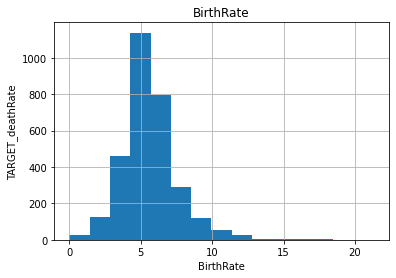

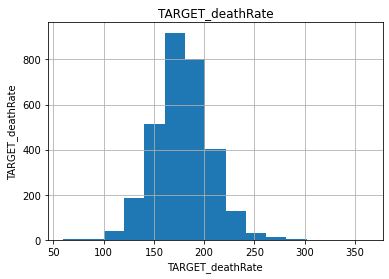

In [21]:
for feature in NumericalFeatures:
  data=df.copy()
  data[feature].hist(bins = 15)
  plt.xlabel(feature)
  plt.ylabel('TARGET_deathRate')
  plt.title(feature)
  plt.show()

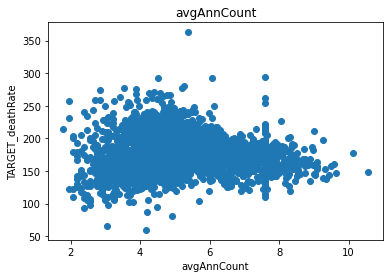

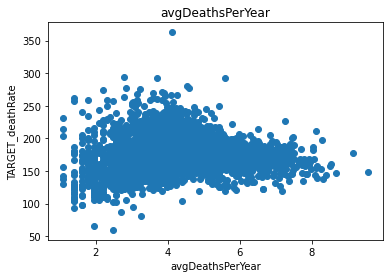

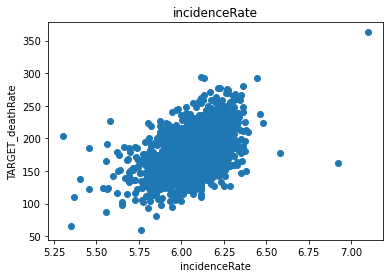

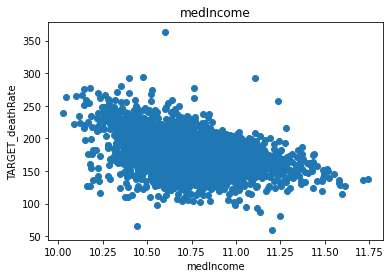

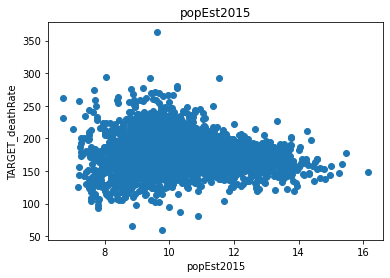

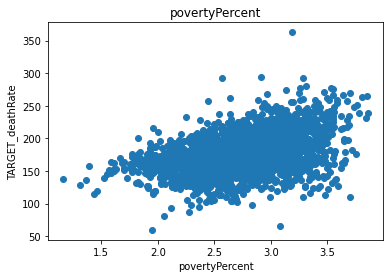

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


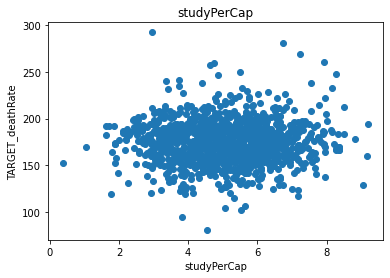

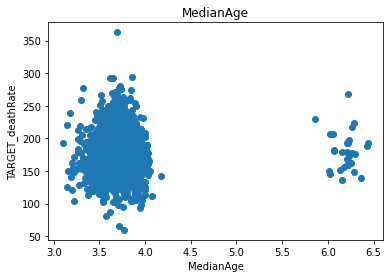

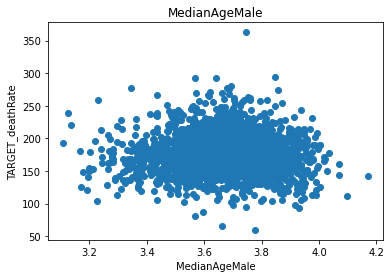

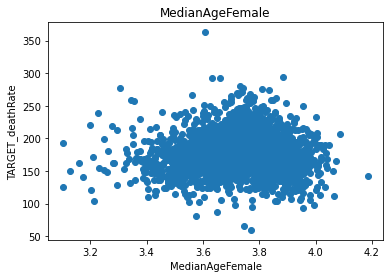

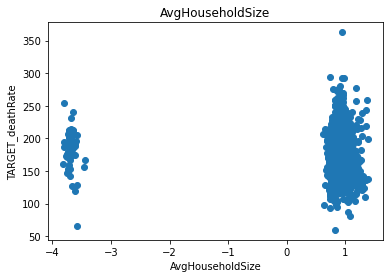

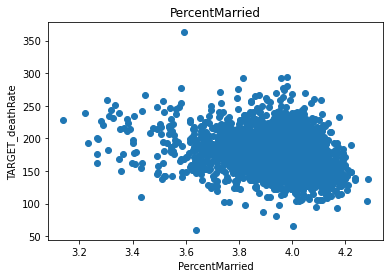

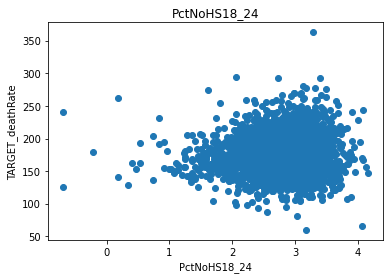

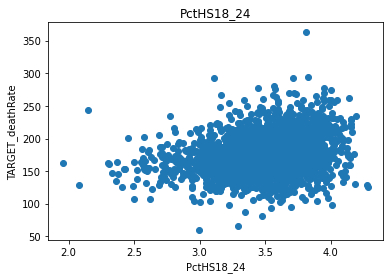

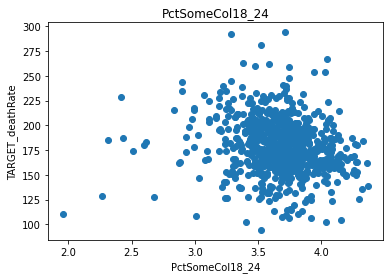

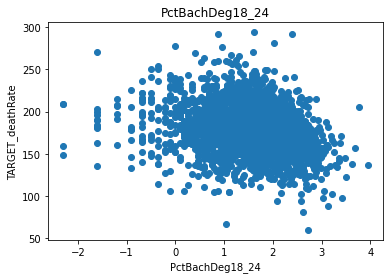

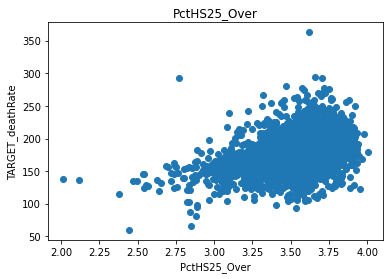

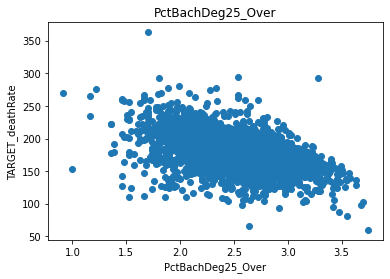

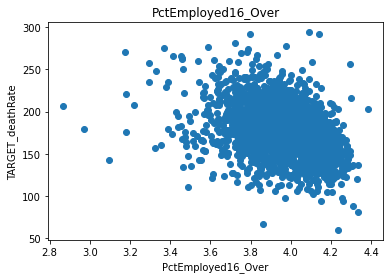

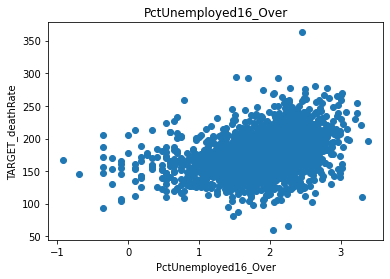

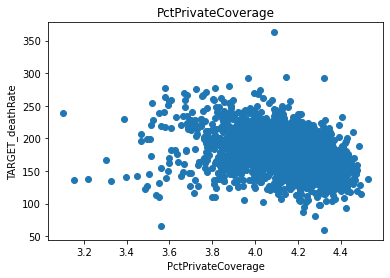

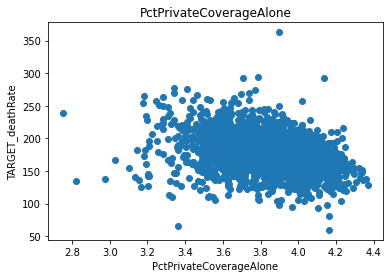

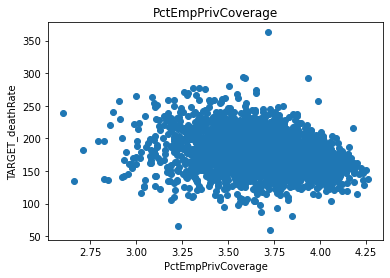

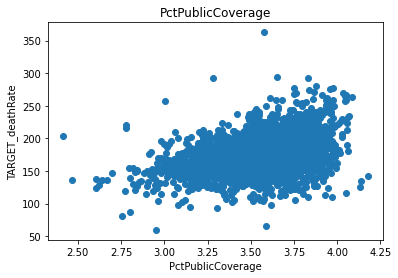

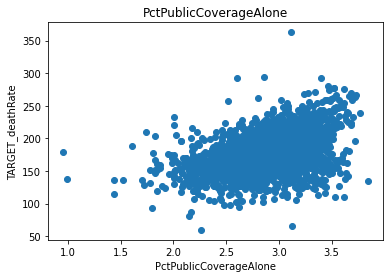

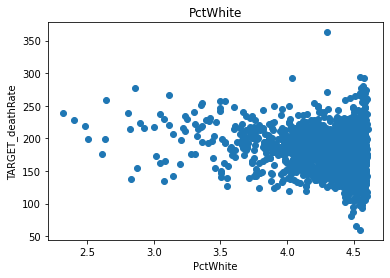

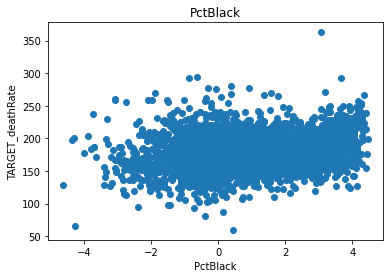

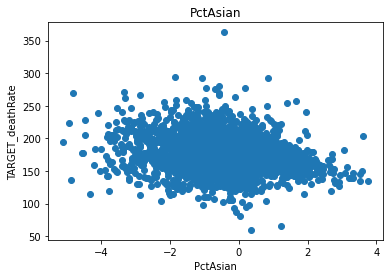

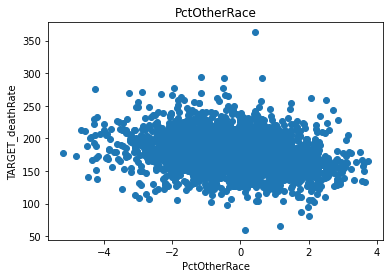

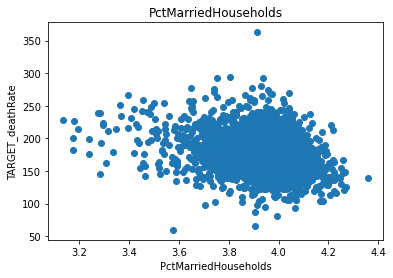

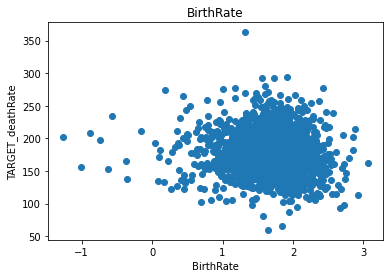

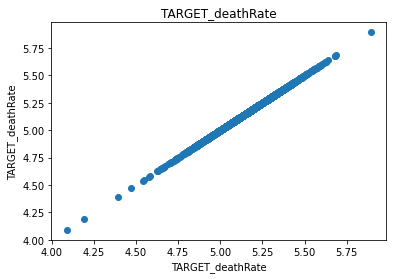

In [22]:
for feature in NumericalFeatures:
  data=df.copy()
  #if (0 not in data[feature].unique()):
  data[feature]=np.log(data[feature])
  plt.scatter(data[feature],data['TARGET_deathRate'])
  plt.xlabel(feature)
  plt.ylabel('TARGET_deathRate')
  plt.title(feature)
  plt.show()

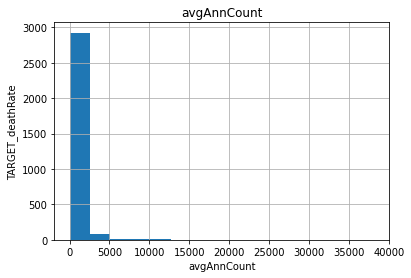

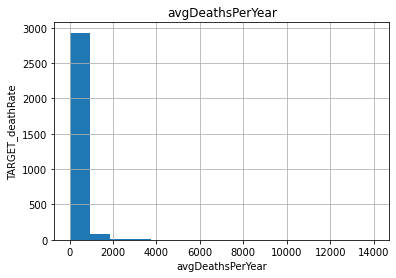

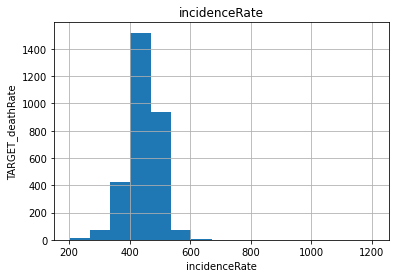

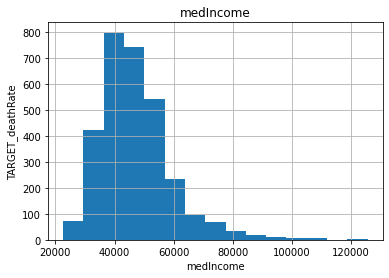

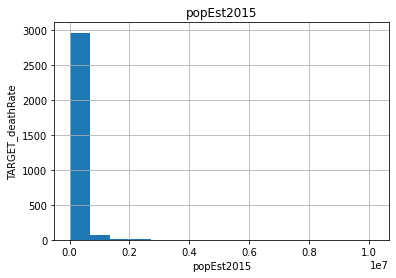

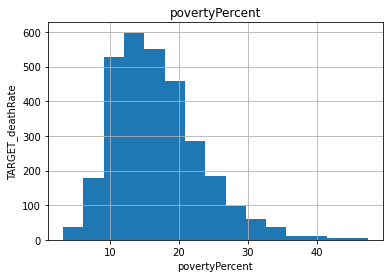

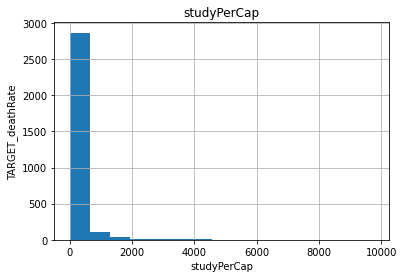

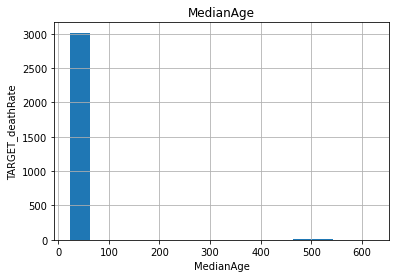

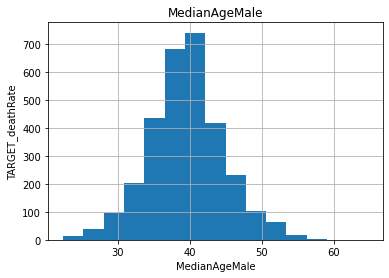

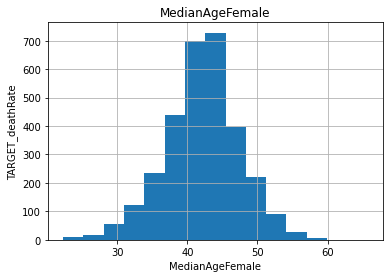

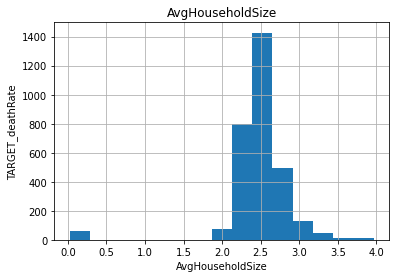

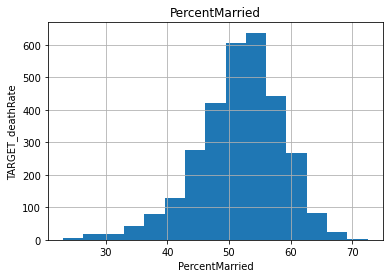

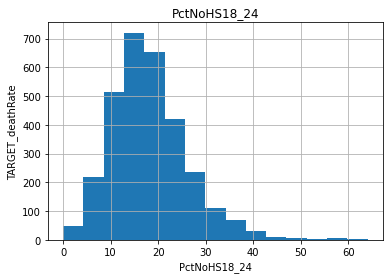

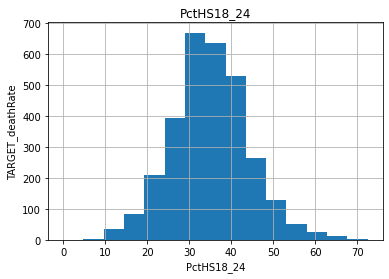

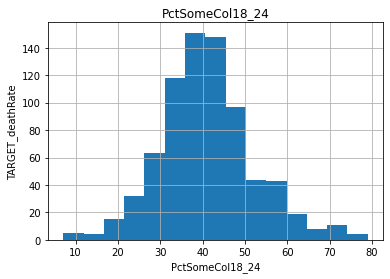

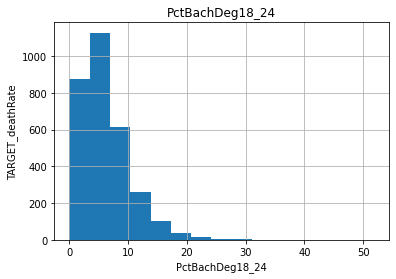

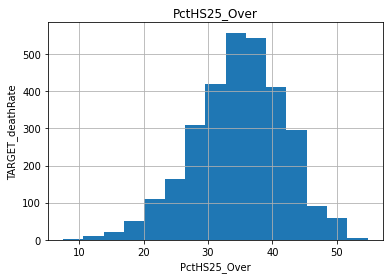

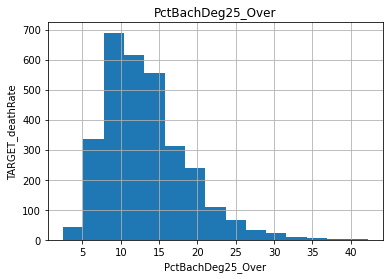

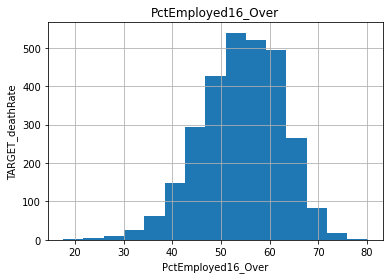

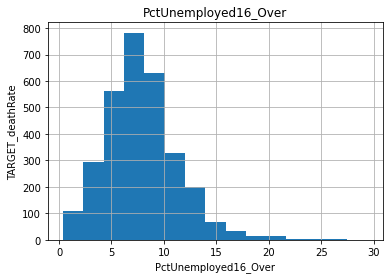

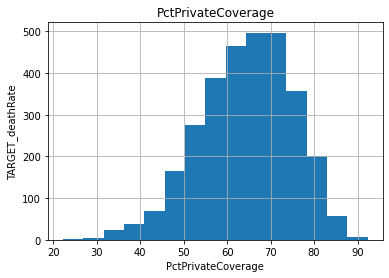

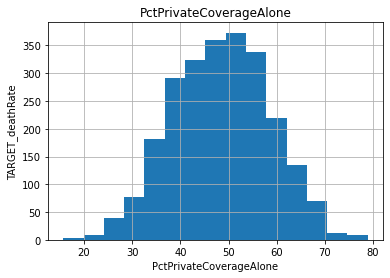

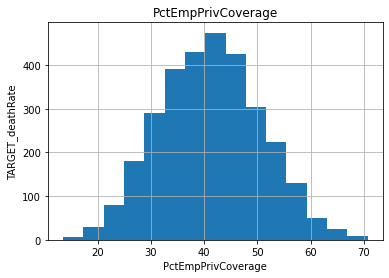

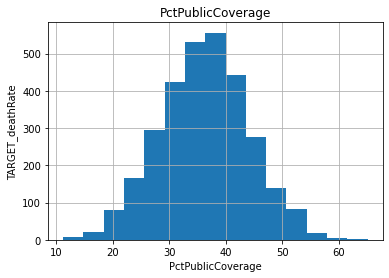

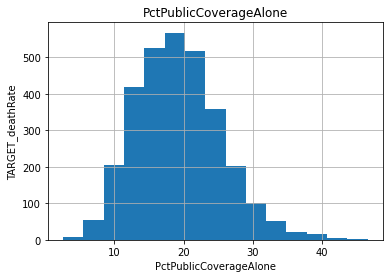

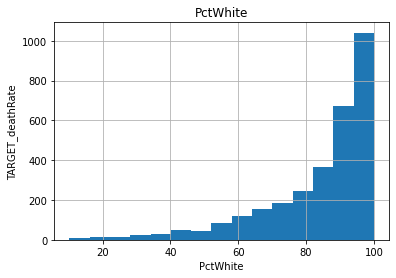

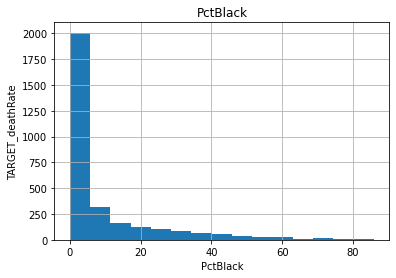

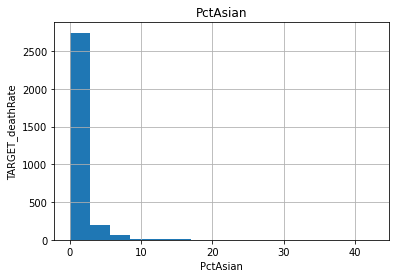

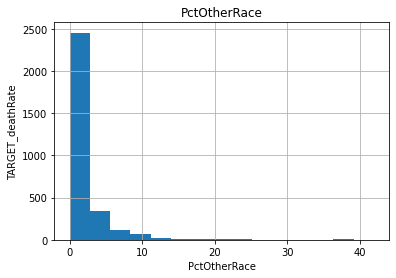

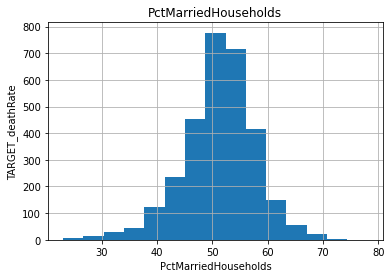

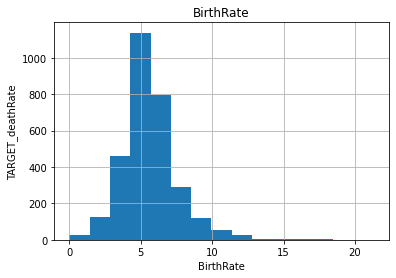

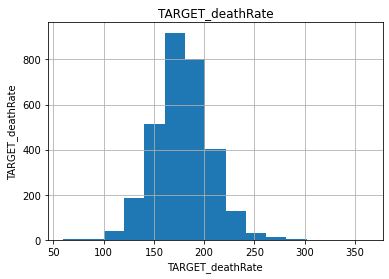

In [23]:
for feature in NumericalFeatures:
  data=df.copy()
  data[feature].hist(bins = 15)
  plt.xlabel(feature)
  plt.ylabel('TARGET_deathRate')
  plt.title(feature)
  plt.show()


In [24]:
df.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [25]:
df= df.fillna(np.mean(df))

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [26]:
df

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1397.000000,469,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,164.9
1,173.000000,70,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,161.3
2,102.000000,50,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,174.7
3,427.000000,202,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,194.8
4,57.000000,26,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,144.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,...,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,149.6
3043,1962.667684,43,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,...,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,150.1
3044,1962.667684,46,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,...,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,153.9
3045,1962.667684,52,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,...,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,175.0


In [27]:
def find_outlier_percent(data):

  # Calculate the mean and standard deviation of the data
  mean = np.mean(data)
  std_dev = np.std(data)

  # Calculate the threshold for identifying outliers
  threshold = mean + 3 * std_dev

  # Find the number of values above the threshold
  outliers = sum(x > threshold for x in data)

    # Calculate the percentage of outliers in the dataset
  outlier_percent = (outliers / len(data)) * 100

  return outlier_percent

In [28]:
Outliers=[]
for features in OutlierFeatures:
  percent = find_outlier_percent(df[features])
  print(features,"=",percent)
  if percent > 0:
    Outliers.append(features)

avgAnnCount = 1.3127666557269446
avgDeathsPerYear = 1.5096816540859863
incidenceRate = 0.1969149983590417
medIncome = 1.6409583196586808
popEst2015 = 1.1814899901542502
povertyPercent = 1.0173941581883819
studyPerCap = 1.8050541516245486
MedianAge = 0.9845749917952084
MedianAgeMale = 0.29537249753856254
MedianAgeFemale = 0.13127666557269443
AvgHouseholdSize = 0.2297341647522153
PercentMarried = 0.03281916639317361
PctNoHS18_24 = 0.9189366590088612
PctHS18_24 = 0.5579258286839515
PctSomeCol18_24 = 2.0019691499835903
PctBachDeg18_24 = 1.279947489333771
PctHS25_Over = 0.0
PctBachDeg25_Over = 1.3127666557269446
PctEmployed16_Over = 0.03281916639317361
PctUnemployed16_Over = 1.0502133245815555
PctPrivateCoverage = 0.0
PctPrivateCoverageAlone = 0.2297341647522153
PctEmpPrivCoverage = 0.06563833278634722
PctPublicCoverage = 0.09845749917952085
PctPublicCoverageAlone = 0.7220216606498195
PctWhite = 0.0
PctBlack = 2.559894978667542
PctAsian = 1.54250082047916
PctOtherRace = 1.8706924844108959
P

In [29]:
Outliers

['avgAnnCount',
 'avgDeathsPerYear',
 'incidenceRate',
 'medIncome',
 'popEst2015',
 'povertyPercent',
 'studyPerCap',
 'MedianAge',
 'MedianAgeMale',
 'MedianAgeFemale',
 'AvgHouseholdSize',
 'PercentMarried',
 'PctNoHS18_24',
 'PctHS18_24',
 'PctSomeCol18_24',
 'PctBachDeg18_24',
 'PctBachDeg25_Over',
 'PctEmployed16_Over',
 'PctUnemployed16_Over',
 'PctPrivateCoverageAlone',
 'PctEmpPrivCoverage',
 'PctPublicCoverage',
 'PctPublicCoverageAlone',
 'PctBlack',
 'PctAsian',
 'PctOtherRace',
 'PctMarriedHouseholds',
 'BirthRate',
 'TARGET_deathRate']

In [30]:
def outliers(df, Outliers):
  for feature in df[Outliers]:
    mean = df[feature].mean()
    std = df[feature].std()
    threshold = 3
    outliers = df[(df[feature] - mean).abs() > threshold * std]
    df[feature][outliers.index] = mean
  return

In [31]:
outliers(df, Outliers)

<ipython-input-30-911c35ec88c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature][outliers.index] = mean
<ipython-input-30-911c35ec88c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature][outliers.index] = mean
<ipython-input-30-911c35ec88c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature][outliers.index] = mean
<ipython-input-30-911c35ec88c9>:7: SettingWithCopyWarning: 
A value is trying to be set on 

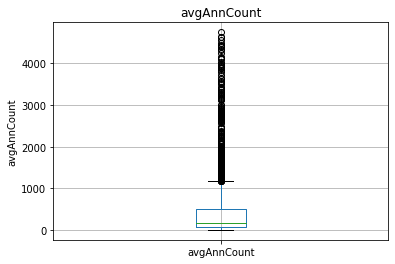

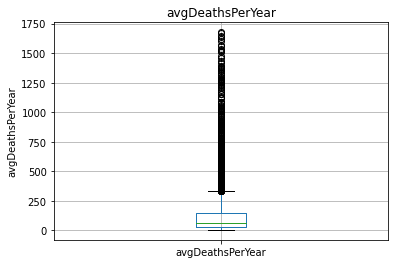

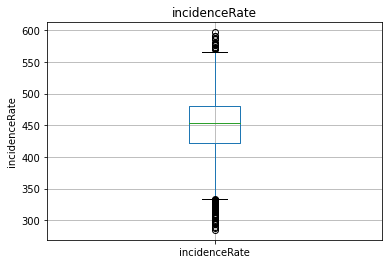

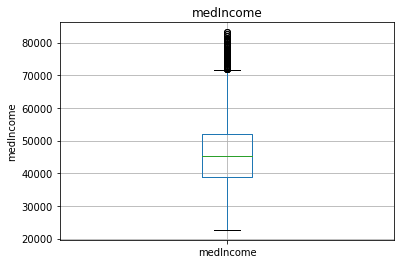

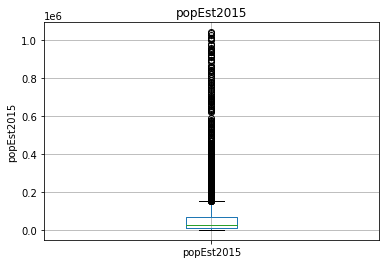

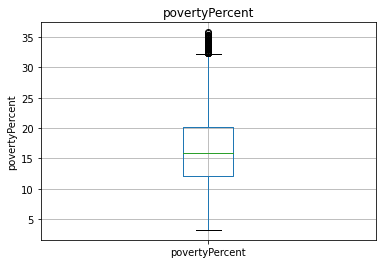

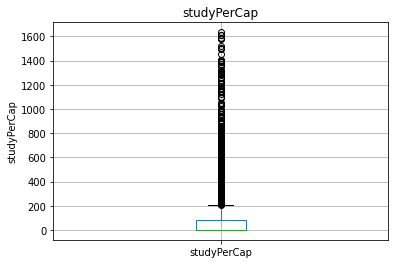

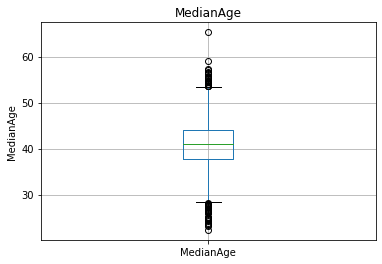

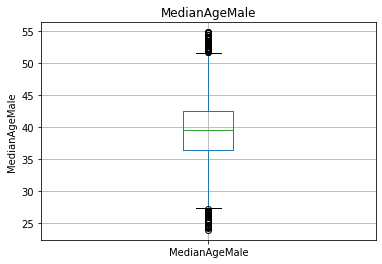

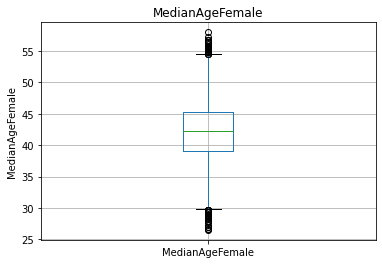

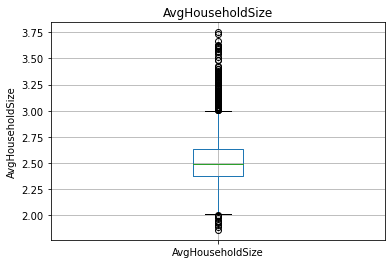

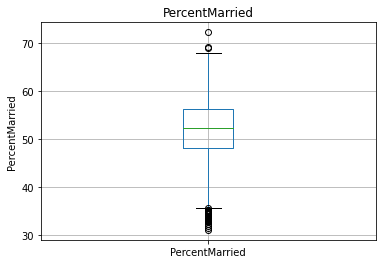

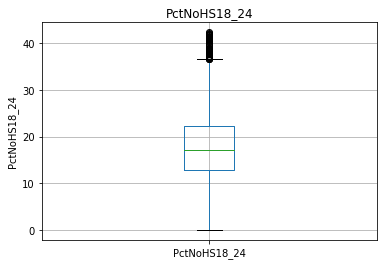

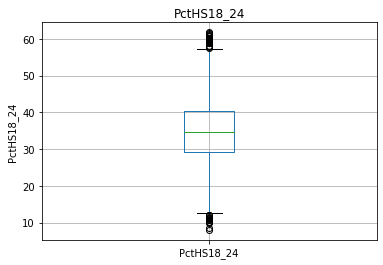

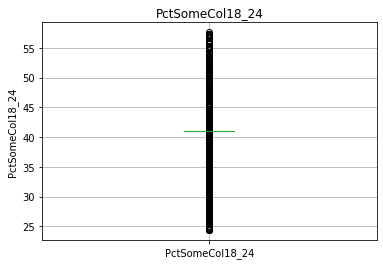

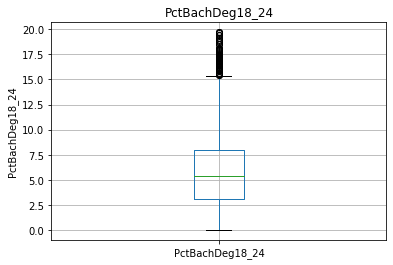

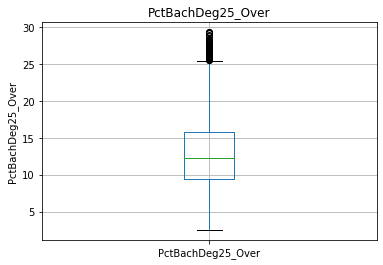

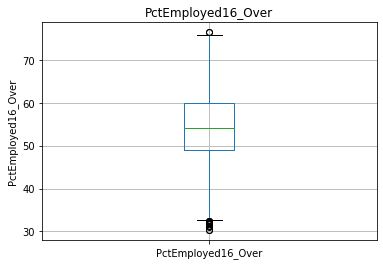

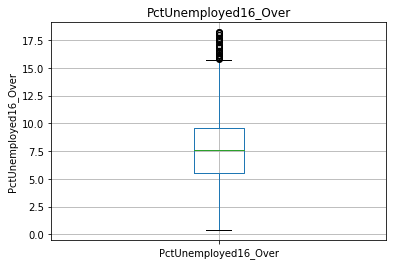

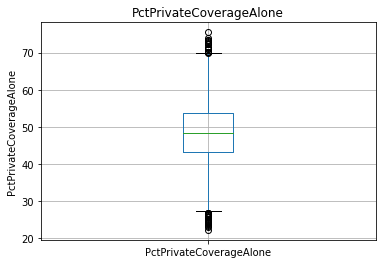

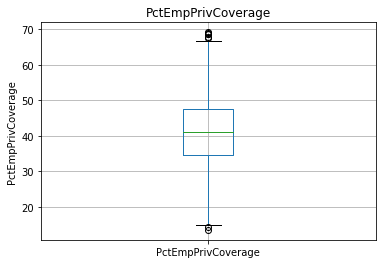

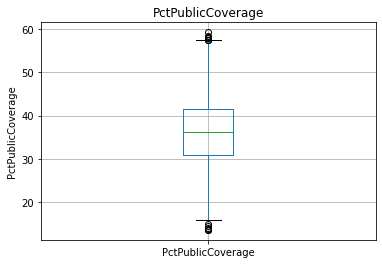

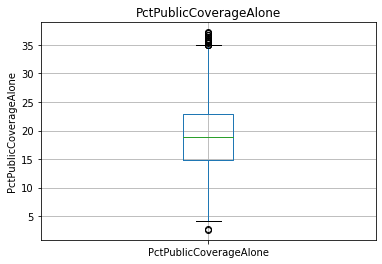

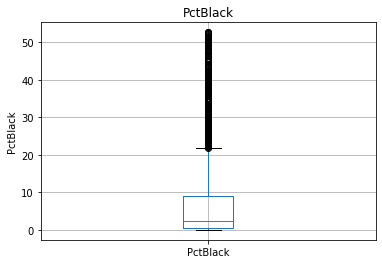

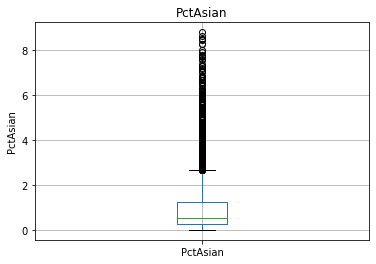

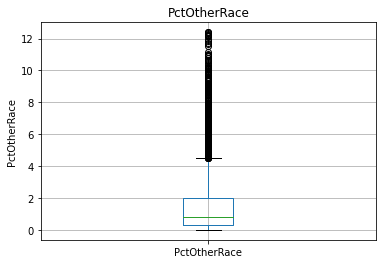

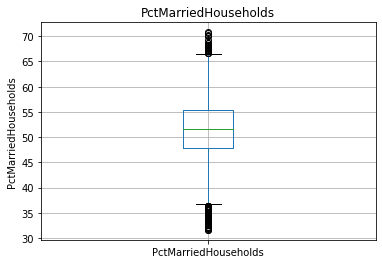

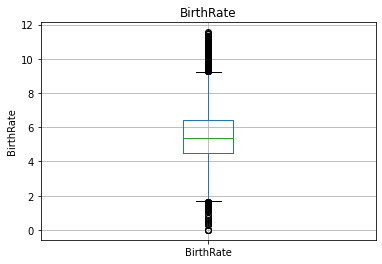

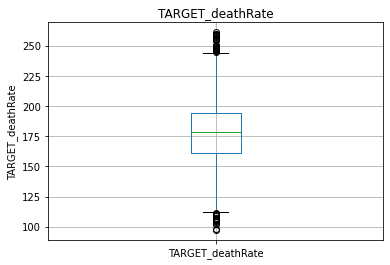

In [32]:
#Plotting the box plot for detecting the outliers
for feature in Outliers:
  dataOutliers=df.copy()
  dataOutliers[feature]=dataOutliers[feature]
  dataOutliers.boxplot(column = feature)
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

In [33]:
df['Geography'].head()

0       Kitsap County, Washington
1     Kittitas County, Washington
2    Klickitat County, Washington
3        Lewis County, Washington
4      Lincoln County, Washington
Name: Geography, dtype: object

In [34]:
df3_mean = df[NumericalFeatures].mean()
df3_std = df[NumericalFeatures].std()
df3 = (df[NumericalFeatures] - df3_mean) / df3_std

In [35]:
df3.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,1.207939,1.429848,0.841523,1.502967,1.267318,-0.914776,1.730995,-0.302060,-0.519965,-0.099574,...,0.044902,-0.430167,-0.869712,-0.113843,-0.447374,2.907819,0.099265,0.231680,0.338785,-0.509360
1,-0.428627,-0.311659,-0.764732,0.175721,-0.235423,0.329450,-0.335515,-1.515956,-1.444464,-1.667982,...,0.257264,-0.661840,-0.647675,0.340856,-0.589711,0.944624,0.990995,-0.996958,-0.694012,-0.646871
2,-0.523559,-0.398953,-2.036180,0.293401,-0.389556,-0.343104,-0.229514,0.796226,0.876618,0.704236,...,-0.666511,0.753936,0.342954,0.444255,-0.609799,-0.412383,0.523960,0.492525,-1.043115,-0.135027
3,-0.089013,0.264479,-0.378574,-0.198618,-0.009432,0.077242,1.049824,0.372326,0.522555,0.233713,...,-0.655893,1.165798,1.009066,0.494468,-0.606038,0.117711,-0.126659,-0.069514,-0.537424,0.632739
4,-0.583726,-0.503705,-2.027964,0.351903,-0.463736,-0.696195,-0.435716,1.432076,1.624086,1.311994,...,-0.645275,0.998479,0.616230,0.638506,-0.650906,-0.259991,-0.535674,0.423996,0.730813,-1.292405


In [36]:
df3.corr()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
avgAnnCount,1.000000,0.757136,0.132387,0.325244,0.723390,-0.229618,0.236798,-0.128091,-0.136080,-0.138854,...,0.311653,-0.249694,-0.193230,-0.072554,0.025844,0.426942,0.183776,-0.072179,-0.000038,-0.174256
avgDeathsPerYear,0.757136,1.000000,0.132502,0.272354,0.876394,-0.119934,0.267986,-0.178724,-0.194037,-0.192269,...,0.264775,-0.192515,-0.083508,-0.171680,0.135696,0.494543,0.211027,-0.159102,-0.089728,-0.079353
incidenceRate,0.132387,0.132502,1.000000,0.020814,0.088612,-0.012407,0.095971,0.005305,0.000821,0.001837,...,0.151817,0.054215,0.039000,-0.008235,0.099523,0.064318,-0.186873,-0.121985,-0.083337,0.418084
medIncome,0.325244,0.272354,0.020814,1.000000,0.305546,-0.785311,0.129236,-0.108899,-0.085696,-0.154826,...,0.715854,-0.730392,-0.698850,0.222766,-0.217502,0.353537,0.115992,0.421261,0.007525,-0.403749
popEst2015,0.723390,0.876394,0.088612,0.305546,1.000000,-0.129903,0.258592,-0.244582,-0.256558,-0.257187,...,0.292052,-0.256212,-0.116245,-0.201812,0.138278,0.542657,0.261431,-0.143711,-0.069468,-0.137947
povertyPercent,-0.229618,-0.119934,-0.012407,-0.785311,-0.129903,1.000000,-0.081316,-0.172754,-0.192087,-0.120477,...,-0.663948,0.631330,0.757488,-0.457213,0.389601,-0.164319,0.033046,-0.561954,-0.015326,0.397897
studyPerCap,0.236798,0.267986,0.095971,0.129236,0.258592,-0.081316,1.000000,-0.135797,-0.137630,-0.138311,...,0.210262,-0.142223,-0.103278,-0.016114,0.008207,0.242201,0.051719,-0.130068,-0.031685,-0.067501
MedianAge,-0.128091,-0.178724,0.005305,-0.108899,-0.244582,-0.172754,-0.135797,1.000000,0.951832,0.937774,...,-0.227807,0.415689,0.039121,0.368915,-0.198577,-0.363002,-0.290739,0.176921,-0.118589,-0.000379
MedianAgeMale,-0.136080,-0.194037,0.000821,-0.085696,-0.256558,-0.192087,-0.137630,0.951832,1.000000,0.912256,...,-0.200699,0.384083,0.018819,0.397142,-0.235697,-0.355855,-0.295439,0.205032,-0.125153,-0.006537
MedianAgeFemale,-0.138854,-0.192269,0.001837,-0.154826,-0.257187,-0.120477,-0.138311,0.937774,0.912256,1.000000,...,-0.244926,0.434483,0.052650,0.341129,-0.171429,-0.353259,-0.292925,0.132517,-0.132031,0.013375


In [37]:
"""NullHypothesis=[]
AlternativeHypothesis=[]
for features in NumericalFeatures:
  if features!='TARGET_deathRate':
    correlationValue = df3[features].corr(df3['TARGET_deathRate'])
    if correlationValue >= 0.5:
      NullHypothesis.append(features)
    else:
      AlternativeHypothesis.append(features)"""

"NullHypothesis=[]\nAlternativeHypothesis=[]\nfor features in NumericalFeatures:\n  if features!='TARGET_deathRate':\n    correlationValue = df3[features].corr(df3['TARGET_deathRate'])\n    if correlationValue >= 0.5:\n      NullHypothesis.append(features)\n    else:\n      AlternativeHypothesis.append(features)"

In [38]:
df3.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

In [39]:
X=df3.iloc[:,:-1]
#X=X.drop(['3'],axis=1)
Y=df3[df3.columns[-1]]

In [40]:
NH = []
AH = []
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge

estimator = Ridge()

rfecv = RFECV(estimator, step=1, cv=5)
rfecv.fit(X, Y)
feature_rankings = dict(zip(X.columns, rfecv.ranking_))

print("Optimal number of features : %d" % rfecv.n_features_)
print("Feature rankings :",feature_rankings)

for key in feature_rankings:
  if feature_rankings[key] < 10:
    NH.append(key)
  else:
    AH.append(key)

Optimal number of features : 17
Feature rankings : {'avgAnnCount': 1, 'avgDeathsPerYear': 1, 'incidenceRate': 1, 'medIncome': 1, 'popEst2015': 1, 'povertyPercent': 8, 'studyPerCap': 12, 'MedianAge': 1, 'MedianAgeMale': 6, 'MedianAgeFemale': 4, 'AvgHouseholdSize': 1, 'PercentMarried': 1, 'PctNoHS18_24': 9, 'PctHS18_24': 1, 'PctSomeCol18_24': 7, 'PctBachDeg18_24': 14, 'PctHS25_Over': 1, 'PctBachDeg25_Over': 1, 'PctEmployed16_Over': 3, 'PctUnemployed16_Over': 1, 'PctPrivateCoverage': 1, 'PctPrivateCoverageAlone': 15, 'PctEmpPrivCoverage': 1, 'PctPublicCoverage': 11, 'PctPublicCoverageAlone': 10, 'PctWhite': 1, 'PctBlack': 2, 'PctAsian': 13, 'PctOtherRace': 1, 'PctMarriedHouseholds': 1, 'BirthRate': 5}


In [41]:
X=df3[NH]

In [42]:
Y

0      -0.509360
1      -0.646871
2      -0.135027
3       0.632739
4      -1.292405
          ...   
3042   -1.093779
3043   -1.074680
3044   -0.929531
3045   -0.123568
3046    1.350848
Name: TARGET_deathRate, Length: 3047, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.1, random_state=1)

In [44]:
X_train

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,...,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctWhite,PctBlack,PctOtherRace,PctMarriedHouseholds,BirthRate
473,-0.642557,-0.599728,-2.315528,0.059680,-0.518507,-0.427174,1.181590,1.329033,1.057127,-1.197228,...,0.628943,1.624996,-2.162164,1.103127,-0.326732,0.805004,-0.674564,0.025856,2.246648,0.834968
321,0.520688,1.006474,0.506715,0.035296,0.569956,-0.208594,-0.070842,-0.106891,-0.040758,-0.191054,...,0.137977,-0.459524,0.821759,0.332962,0.501480,0.238153,0.071899,-0.541330,-0.451148,-0.284718
707,-0.468739,-0.355306,0.968873,-1.021604,-0.376944,0.884307,0.526472,0.561895,0.547395,-0.023359,...,-1.109897,-0.779236,0.567808,-0.427812,-0.188697,0.833585,-0.601778,-0.537517,1.066736,-1.177370
1032,2.036918,2.630134,0.482067,2.004912,2.486636,-0.729823,-0.687424,-0.716667,-0.687727,1.527825,...,0.935798,0.128745,1.170941,0.455061,0.681988,-1.821181,0.543159,3.330179,-0.220076,-0.213571
1060,-0.421942,-0.276742,-1.081054,-0.098383,-0.327516,-0.174966,1.239394,1.132331,1.292389,-0.484522,...,-0.066593,-1.022217,1.266173,-1.010133,-1.027527,0.686880,-0.590524,-0.050007,0.288341,1.429800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0.016615,0.321219,0.256123,-1.438158,0.082910,2.380741,-0.417669,-0.598646,-0.295625,0.437804,...,-0.271162,-0.971063,1.615356,-1.160409,-1.123089,-3.011330,0.122913,-0.325452,-2.098170,0.369827
905,-0.424616,-0.294200,-1.654129,1.585275,-0.205966,-0.948403,-0.090110,-0.047880,-0.177994,1.569749,...,0.097063,-0.017984,-0.606715,0.661691,0.618279,0.593324,-0.533344,0.126162,1.639837,-0.139875
1096,5.264590,5.829444,1.196871,2.290967,4.842320,-0.998845,-0.051574,-0.126561,-0.001548,0.270108,...,1.897274,1.049515,-0.003581,0.680475,1.149184,-0.234942,-0.331976,4.017239,-0.481229,-0.409304
235,-0.154529,0.068068,-0.998892,0.915050,0.009354,-0.830706,0.121840,0.207832,0.018057,0.186261,...,0.281175,0.896053,-0.733690,0.802575,0.958058,0.647703,-0.514835,-0.109101,1.108619,-0.404076


In [45]:
X_test

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,...,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctWhite,PctBlack,PctOtherRace,PctMarriedHouseholds,BirthRate
6,-0.325673,-0.193813,0.266393,-0.821327,-0.247571,1.102887,0.333790,0.522555,0.253318,-0.442598,...,-0.230248,-0.318851,0.377345,-1.395216,-1.367306,-0.521295,-0.620544,3.159563,-0.070764,-0.768493
1677,0.594227,0.840616,-0.088955,2.570372,1.020199,-1.822724,-0.417669,-0.441284,-0.432860,0.857043,...,2.449612,1.049515,-0.511483,1.826332,2.518919,0.368012,-0.371935,-0.470143,2.009356,-0.476971
1498,-0.621164,-0.547352,-1.578130,-0.938525,-0.496097,0.716169,0.275985,0.050470,0.312133,-0.065283,...,-0.741672,-0.497890,0.440833,-1.517315,-1.632758,-0.715818,-0.632381,-0.047408,-0.330507,-0.546155
1819,-0.621164,-0.577904,1.815135,-0.268011,-0.485910,-0.713009,-1.959124,-2.054240,-2.138504,2.366303,...,-0.823500,1.573842,-0.670203,-1.122840,-0.486003,0.325634,-0.564710,1.276243,-0.317276,2.249491
1866,0.007256,0.321219,0.184232,-0.518791,0.015950,0.598472,0.487935,0.365193,0.508185,0.353956,...,-0.312076,-0.792024,0.028162,-0.944387,-0.825783,0.345893,-0.078846,-0.222816,0.624462,0.136860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,0.179737,0.373596,-0.512086,1.042271,0.149911,-0.881148,1.566953,1.565075,1.625675,-0.610293,...,1.754076,-0.561832,0.663040,0.220254,-0.645275,0.532575,-0.631837,0.034381,0.068559,-0.840919
2937,-0.454031,-0.346576,0.720335,-0.184932,-0.351603,-0.359918,-0.090110,0.109481,-0.256414,0.060489,...,-0.700758,0.154322,0.028162,0.342354,0.798787,0.838543,-0.653893,-0.641899,1.055409,1.650039
102,-0.633198,-0.573540,-0.990676,-0.233314,-0.513836,-0.763451,1.663294,1.604415,1.625675,-1.322999,...,-0.618931,1.011149,-1.463799,1.056166,0.331590,0.870735,-0.567476,-0.570315,0.412572,1.422478
2577,-0.364448,-0.246189,0.979143,-0.068216,-0.319741,-0.595312,0.776958,0.817608,0.763051,-0.400674,...,-0.762129,-0.017984,-0.003581,0.361138,0.522716,0.883721,-0.637216,-0.750332,0.936592,-0.882755


In [46]:
Y_train

473    -2.805018
321     0.594541
707     1.251535
1032   -0.058632
1060   -0.562837
          ...   
2763    0.606001
905    -0.971548
1096   -0.639231
235    -0.845496
1061   -0.555197
Name: TARGET_deathRate, Length: 2742, dtype: float64

In [47]:
Y_test

6      -0.089190
1677   -0.681248
1498    0.670936
1819   -0.012796
1866    0.449392
          ...   
1011   -1.273306
2937    0.311881
102     0.350079
2577    0.269864
1225    0.117075
Name: TARGET_deathRate, Length: 305, dtype: float64

In [48]:
#class function for Ridge Regression
"""
class RidgeRegression:
  def __init__(self, learningRate):
    self.learningRate = learningRate         #Initialising the learningRate
    

  def fit(self,Xtrain,Ytrain):
    X2 = Xtrain 
    Y_train = Ytrain
    alpha = self.learningRate

    #x_mean = X_train.mean()
    #x_std = X_train.std()

    #X2 = (X_train - x_mean) / x_std
    if 'intercept' not in X2:
      X2.insert(0,'intercept',1)            #Adding the intercept column
    

    identity = np.identity(len(X2.columns))
    identity[0,0] = 0                          #setting the first row value of identity matrix to 0 
    penalty1 = identity * alpha

    global res
    res = np.dot(np.dot(np.linalg.inv(np.dot(X2.T, X2) + penalty1), X2.T),Y_train)              #Applying the ridge formula
    return res

  def predict(self,Xtest):
    X3 = Xtest
    if 'intercept' not in X3:
      X3.insert(0,'intercept',1) 

    y_pred = np.dot(X3, res)

    return y_pred"""
    

"\nclass RidgeRegression:\n  def __init__(self, learningRate):\n    self.learningRate = learningRate         #Initialising the learningRate\n    \n\n  def fit(self,Xtrain,Ytrain):\n    X2 = Xtrain \n    Y_train = Ytrain\n    alpha = self.learningRate\n\n    #x_mean = X_train.mean()\n    #x_std = X_train.std()\n\n    #X2 = (X_train - x_mean) / x_std\n    if 'intercept' not in X2:\n      X2.insert(0,'intercept',1)            #Adding the intercept column\n    \n\n    identity = np.identity(len(X2.columns))\n    identity[0,0] = 0                          #setting the first row value of identity matrix to 0 \n    penalty1 = identity * alpha\n\n    global res\n    res = np.dot(np.dot(np.linalg.inv(np.dot(X2.T, X2) + penalty1), X2.T),Y_train)              #Applying the ridge formula\n    return res\n\n  def predict(self,Xtest):\n    X3 = Xtest\n    if 'intercept' not in X3:\n      X3.insert(0,'intercept',1) \n\n    y_pred = np.dot(X3, res)\n\n    return y_pred"

In [49]:
"""def gridSearch():
  alpha_range = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  best_alpha = None
  best_train_score = np.inf
  best_test_score = np.inf


  # Loop through all possible combinations of hyperparameters
  for alpha in alpha_range:

    # Initialize the model
    ridge = RidgeRegression(learningRate=0.7)
    res = ridge.fit(X_train,Y_train)
    res

    ypredtest = ridge.predict(X_test)
    scoretest = rmse(Y_test,ypredtest)
    ypredtrain = ridge.predict(X_train)
    scoretrain = rmse(Y_train.head(len(ypredtrain)),ypredtrain)
    


    if scoretest < best_test_score:
      best_alpha = alpha
      best_test_score = scoretest
    if scoretest < best_train_score:
      best_alpha = alpha
      best_train_score = scoretrain
  print("test score",scoretest)
  print("train score",scoretrain)
  print("best_alpha",best_alpha)

  return best_alpha,ypredtest"""

'def gridSearch():\n  alpha_range = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]\n  best_alpha = None\n  best_train_score = np.inf\n  best_test_score = np.inf\n\n\n  # Loop through all possible combinations of hyperparameters\n  for alpha in alpha_range:\n\n    # Initialize the model\n    ridge = RidgeRegression(learningRate=0.7)\n    res = ridge.fit(X_train,Y_train)\n    res\n\n    ypredtest = ridge.predict(X_test)\n    scoretest = rmse(Y_test,ypredtest)\n    ypredtrain = ridge.predict(X_train)\n    scoretrain = rmse(Y_train.head(len(ypredtrain)),ypredtrain)\n    \n\n\n    if scoretest < best_test_score:\n      best_alpha = alpha\n      best_test_score = scoretest\n    if scoretest < best_train_score:\n      best_alpha = alpha\n      best_train_score = scoretrain\n  print("test score",scoretest)\n  print("train score",scoretrain)\n  print("best_alpha",best_alpha)\n\n  return best_alpha,ypredtest'

In [50]:
#best_alpha,ypred = gridSearch()

In [51]:
def rmse(Ytest,Ypred):
    squared_error = (Ytest - Ypred) ** 2
    mean_squared_error = np.mean(squared_error)
    rmse = np.sqrt(mean_squared_error)
    return rmse

In [52]:
def rsquare(Ytest,Ypred):
  ss_res = ((Ytest - Ypred) ** 2).sum()
  ss_tot = ((Ytest - Ypred.mean()) ** 2).sum()
  r2 = 1 - (ss_res / ss_tot)
  return r2

In [53]:
def mae(Ytest,Ypred):
    absolute_error = np.abs(Ytest - Ypred)
    mae = np.mean(absolute_error)
    return mae

In [54]:
best_alpha,ypred = ridge.gridSearchh(X_train,Y_train,X_test,Y_test) 

test score 0.7237007856772076
train score 0.7217615938177105
best_alpha 0.3


In [55]:
Ridge1 = ridge.RidgeRegression(learningRate=0.3)

In [56]:
rfit = Ridge1.fit(X_train,Y_train)
rfit

array([-0.00153659, -0.0826858 ,  0.11738804,  0.36442426, -0.02785085,
       -0.05342736,  0.02901331, -0.13287585,  0.01983461, -0.02168176,
       -0.11734696,  0.09622306, -0.02220289,  0.09253408,  0.01511062,
        0.14624646, -0.15532872, -0.03027665,  0.08152322, -0.24266754,
        0.10743541, -0.07703449,  0.03269606, -0.07995332, -0.06000549,
       -0.03067854])

In [57]:
ypred = Ridge1.predict(X_test)

In [58]:
print("RMSE------->",ridge.rmse(Y_test,ypred))
print("rSquare---->",ridge.rsquare(Y_test, ypred))
print("MAE-------->",ridge.mae(Y_test, ypred))

RMSE-------> 0.7237115026969801
rSquare----> 0.46246444778010687
MAE--------> 0.5554708904091558


In [59]:
from sklearn.metrics import r2_score,mean_absolute_error

In [60]:
from sklearn.linear_model import Ridge
RidgeRegressor = Ridge(alpha=best_alpha)

In [61]:
yfit = RidgeRegressor.fit(X_train,Y_train)
yfit

Ridge(alpha=0.3)

In [62]:
yp = RidgeRegressor.predict(X_test)

In [63]:
print("RMSE------->",rmse(Y_test,yp))
print("rSquare---->",rsquare(Y_test, yp))
print("MAE-------->",mae(Y_test, yp))

RMSE-------> 0.7237115026969803
rSquare----> 0.46246444778010676
MAE--------> 0.5554708904091558


In [64]:
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()
yfitL = Linear.fit(X_train,Y_train)
ypL = Linear.predict(X_test)

In [65]:
print("RMSE------->",rmse(Y_test,ypL))
print("rSquare---->",rsquare(Y_test, ypL))
print("MAE-------->",mae(Y_test, ypL))

RMSE-------> 0.723719578597021
rSquare----> 0.46245231622713645
MAE--------> 0.555473986701832
